Input name of image:
C:/soft/bb/MusicGenerator/Sonic.png
nn
 0 0 63 110 25 0 0 2 46 108 52 0 2 63 32 0 768 0 51 61 80 0 9 42 100 0 768 9 61 9


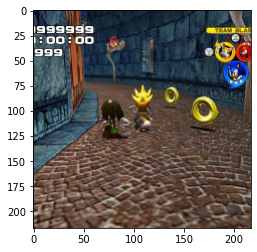

In [4]:
#ide na git
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import argparse

img_path = "C:/soft/bb/MusicGenerator/first.png"#args['image']

def extract_features(filename, model):
    try:
        picture = Image.open(filename)
    except:
        print("Can't open image! Check path.")
    picture = picture.resize((299,299))
    picture = np.array(picture)
    
    if picture.shape[2] == 4:
        picture = picture[..., :3]
    picture = np.expand_dims(picture, axis=0)
    picture = picture/127.5
    picture = picture - 1.0
    feature = model.predict(picture)
    return feature

def word_for_id(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

def generate_desc(model, tokenizer, photo_to_predict, max_length):
    in_text = ''
    for i in range(max_length):
        seq = tokenizer.texts_to_sequences([in_text])[0]
        seq = pad_sequences([seq], maxlen=max_length)
        prediction = model.predict([photo_to_predict,seq], verbose=0)
        prediction = np.argmax(prediction)
        word = word_for_id(prediction, tokenizer)
        if word is None:
            break
        in_text += ' ' + word
        if word == 'end':
            break
    return in_text
max_length = 30
tokenizer = load(open("tokenizer.p","rb"))
model = load_model('models/model_9.h5')
xception_model = Xception(include_top=False, pooling="avg")

try:
    print("Input name of image:")
    img_path2 = input()
    photo = extract_features(img_path2, xception_model)
    img = Image.open(img_path2)
    description = generate_desc(model, tokenizer, photo, max_length)
    print("nn")
    print(description)
    plt.imshow(img)
except:
    print("Something went wrong")

In [1]:
import numpy as np
from PIL import Image
import os
import string
from pickle import dump
from pickle import load
from keras.applications.xception import Xception #to get pre-trained model Xception
from keras.applications.xception import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.text import Tokenizer #for text tokenization
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers.merge import add
from keras.models import Model, load_model
from keras.layers import Input, Dense#Keras to build our CNN and LSTM
from keras.layers import LSTM, Embedding, Dropout
from tqdm import tqdm_notebook as tqdm #to check loop progress
tqdm().pandas()

from keras.preprocessing.text import Tokenizer

<ipython-input-1-8a584cf2be25>:19: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  tqdm().pandas()


0it [00:00, ?it/s]

In [18]:
stri = "1-"
i = 0

for number in description.split(" ")[2:]: 
    if i % 5 == 0:
        if int(number)>256:
            stri+="256-"
        else:
            stri += number+"-"
    else:
        if i % 5 == 1:
            print(number)
            if int(number)>127:
                stri+="127-"
            else:
                stri += number+"-"
        else:
           
            
            if i % 5 == 2: 
                if int(number)>127:
                    stri+="127-"
                else:
                    stri += number+"-"
            else:

                if i % 5 == 4:
                    stri+="1"
                else:
                    stri += number

                if i % 5 == 3:
                    stri+=" "
                else:
                    stri+="-"
    i+=1
    
print(stri)   
sourceFile = open('demo.txt', 'w')
print(stri, file = sourceFile)
sourceFile.close()

63
2
2
0
9
9
1-0-63-110-25 1-0-2-46-108 1-0-2-63-32 1-256-0-51-61 1-0-9-42-100 1-256-9-61-9 


In [ ]:
1-0-48-127-87 1-0-63-78-0 1-0-75-100-81 0-0-75-100-81 0-0-48-127-81 0-0-68-100-81